# Predicting Wind Energy with ML


In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [25]:
import pandas as pd 
df1=pd.read_csv("Location1.csv")
df2=pd.read_csv("Location2.csv")
df3=pd.read_csv("Location3.csv")
df4=pd.read_csv("Location4.csv")


In [26]:
df=pd.concat([df1, df2, df3, df4], ignore_index=True)

In [27]:
df.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [28]:
df.drop(['Time'],axis=1,inplace=True)

In [29]:
df. head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [30]:
df.describe

<bound method NDFrame.describe of         temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
0                 28.5                   85         24.5           1.44   
1                 28.4                   86         24.7           2.06   
2                 26.8                   91         24.5           1.30   
3                 27.4                   88         24.3           1.30   
4                 27.3                   88         24.1           2.47   
...                ...                  ...          ...            ...   
175195            25.5                   94         24.0           4.01   
175196            25.3                   92         23.2           4.70   
175197            24.9                   90         22.5           4.61   
175198            24.9                   89         22.1           4.60   
175199            24.9                   88         21.8           4.65   

        windspeed_100m  winddirection_10m  winddirection_100m  wi

In [31]:
df.columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

In [32]:
df.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  int64  
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  int64  
 6   winddirection_100m   175200 non-null  int64  
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 12.0 MB


In [34]:
df.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000
mean,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429
std,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325
min,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700
50%,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100
75%,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400


<Axes: >

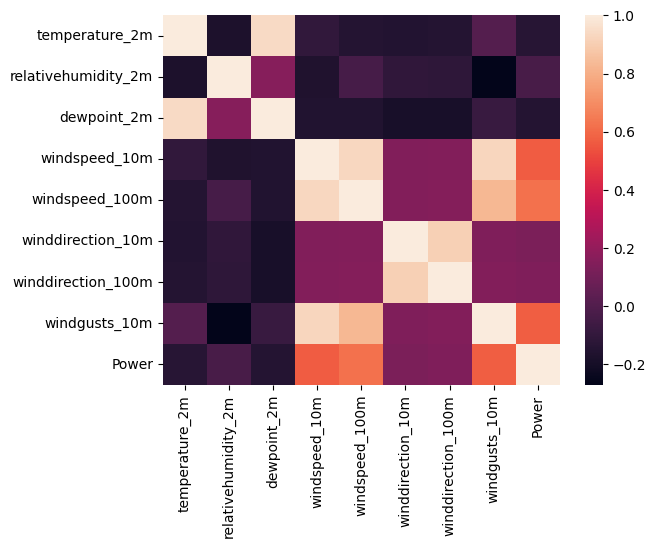

In [35]:
corr=df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



In [36]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
temperature_2m,1.00,-0.17,0.94,-0.10,-0.15,-0.15,-0.15,0.01,-0.14
relativehumidity_2m,-0.17,1.00,0.16,-0.16,-0.03,-0.11,-0.11,-0.27,-0.03
dewpoint_2m,0.94,0.16,1.00,-0.16,-0.16,-0.19,-0.19,-0.08,-0.15
windspeed_10m,-0.10,-0.16,-0.16,1.00,0.93,0.14,0.15,0.93,0.56
windspeed_100m,-0.15,-0.03,-0.16,0.93,1.00,0.15,0.16,0.83,0.62
winddirection_10m,-0.15,-0.11,-0.19,0.14,0.15,1.00,0.91,0.14,0.13
winddirection_100m,-0.15,-0.11,-0.19,0.15,0.16,0.91,1.00,0.15,0.14
windgusts_10m,0.01,-0.27,-0.08,0.93,0.83,0.14,0.15,1.00,0.57
Power,-0.14,-0.03,-0.15,0.56,0.62,0.13,0.14,0.57,1.00


# Modeling

First we will train with Random Forest Classifier

In [37]:
X=df.drop(['Power'],axis=1)
y=df['Power']

In [38]:
import sklearn
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [39]:
rf = RandomForestRegressor(n_estimators=100,criterion='poisson',max_depth = 5,random_state = 18,max_features='sqrt')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117384, 8)
(57816, 8)
(117384,)
(57816,)


In [41]:
rf.fit(X_train,y_train)

prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
r2=r2_score(y_test,prediction)

print(mse)
print(rmse)
print(r2)

0.03682193156833574
0.19189041551973288
0.44540499827498226


Lets Try XGBoost Regressor

In [42]:
import xgboost
from xgboost import XGBRegressor

xgb=XGBRegressor()

xgb.fit(X_train,y_train)
prediction = xgb.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
r2=r2_score(y_test, prediction)

print(mse)
print(rmse)
print(r2)



0.030337976180606296
0.17417800142557124
0.5430633528555722


Lets try some simpler model that is Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
r2=r2_score(y_test, prediction)

print(mse)
print(rmse)
print(r2)


0.03714201215514173
0.1927226301064349
0.44058409165680623


Out of all XGBoost Regressor gives the best results so we will select XGBoost Regressor as our final model

In [45]:
import pickle

pickle.dump(xgb, open("xgb_model.pkl", "wb"))  

loaded_model = pickle.load(open("xgb_model.pkl", "rb"))

prediction = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
r2=r2_score(y_test, prediction)

print(mse)
print(rmse)
print(r2)

0.030337976180606296
0.17417800142557124
0.5430633528555722
